# Clustering

In [255]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from scipy.stats import f_oneway
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler




In [256]:
!pip install kmodes

In [257]:
data = pd.read_csv('data/actors_scores.csv')


In [258]:
data

,ActorName,Movies,ReleaseDates,ActorDOB,ActorGender,Characters,Ratings,NumVotes,year_ceremony,Oscar,...,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Straight_Hair,Wavy_Hair
0,'Big' Lee,"('23010798',)",['1973'],1939,M,['Junkie in Casino'],"(5.7,)","(939.0,)",NaN,nothing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,'Chicken' Holleman,"('1873017',)",['1972'],NaN,NaN,[nan],"(6.0,)","(11386.0,)",NaN,nothing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,'Evil' Ted Smith,"('tt7850334', 'tt0119116', 'tt16235342')",['1991'],NaN,NaN,['Ronnie'],"(4.0, 4.3, 4.9)","(850.0, 1576.0, 6239.0)",NaN,nothing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,'Kecske' Molnár Levente,"('31935934',)",['2010'],NaN,M,['Ovidiu'],"(6.9,)","(1181.0,)",NaN,nothing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,'King Kong' Kashey,"('24051101',)",['1943'],1903-11-28,M,"[""Paj Mab's Guard #2""]","(4.5,)","(286.0,)",NaN,nothing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121440,都はるみ,"('25896239',)",['1983'],1948-02-22,F,[nan],"(6.4,)","(77.0,)",NaN,nothing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121441,關淑怡,"('26669413', '184987')","['1992', '1997']",1966-08-15,F,"[nan, nan]","(7.7, 4.9)","(35355.0, 222.0)",NaN,nothing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121442,陳文媛,"('3059526',)",['2003'],1979-09-18,F,[nan],"(3.0,)","(387.0,)",NaN,nothing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121443,陳曉東,"('7055021', '34430625')","['1998', '2012']",1975-09-03,M,"[nan, nan]","(5.6, 6.1)","(133.0, 1276.0)",NaN,nothing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [259]:
data['ActorHeight'] = data['ActorHeight'].replace(180, np.nan) ## dropped 510 et 280 but we could convert and keep them
data['ActorHeight'] = data['ActorHeight'].replace(510, np.nan) ## dropped 510 et 280 but we could convert and keep them



Keeping the interesting columns - not using CelebA because Kmodes cannot handle Nan and too much loss of data if dropped

In [260]:
cat_features = ['Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs',
                'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Brown_Hair',
                'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Goatee', 'Gray_Hair',
                'High_Cheekbones', 'Male', 'Mustache', 'Narrow_Eyes', 'No_Beard',
                'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
                'Rosy_Cheeks', 'Sideburns', 'Straight_Hair', 'Wavy_Hair', 
                'ActorGender', 'socioeconomic_background', 'education_level', 
                'early_life_opportunities']

col_withoutcelebA = ['ActorGender','socioeconomic_background',
       'education_level', 'early_life_opportunities',
       'Score_PCA_2_scaled', 'ActorHeight']

cat_features_withoutcelebA = ['ActorGender','socioeconomic_background',
       'education_level', 'early_life_opportunities',]

features_using = ['Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs',
                'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Brown_Hair',
                'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Goatee', 'Gray_Hair',
                'High_Cheekbones', 'Male', 'Mustache', 'Narrow_Eyes', 'No_Beard',
                'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
                'Rosy_Cheeks', 'Sideburns', 'Straight_Hair', 'Wavy_Hair', 
                'ActorGender', 'socioeconomic_background', 'education_level', 
                'early_life_opportunities', 'Score_PCA_2_scaled', 'ActorHeight']

In [261]:
data = data.dropna(subset=col_withoutcelebA)

In [262]:
data.shape

(33273, 53)

In [263]:
data = data[features_using]

In [264]:
print(data.isna().sum())


Arched_Eyebrows             29334
Attractive                  29334
Bags_Under_Eyes             29334
Bald                        29334
Bangs                       29334
Big_Lips                    29334
Big_Nose                    29334
Black_Hair                  29334
Blond_Hair                  29334
Brown_Hair                  29334
Bushy_Eyebrows              29334
Chubby                      29334
Double_Chin                 29334
Goatee                      29334
Gray_Hair                   29334
High_Cheekbones             29334
Male                        29334
Mustache                    29334
Narrow_Eyes                 29334
No_Beard                    29334
Oval_Face                   29334
Pale_Skin                   29334
Pointy_Nose                 29334
Receding_Hairline           29334
Rosy_Cheeks                 29334
Sideburns                   29334
Straight_Hair               29334
Wavy_Hair                   29334
ActorGender                     0
socioeconomic_

# Plotting without clustering

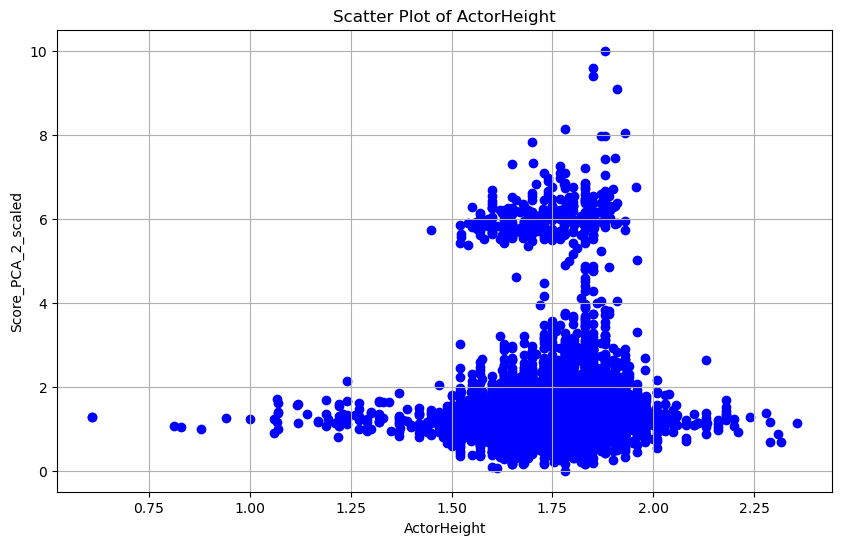

In [265]:
import matplotlib.pyplot as plt

# Scatter Plot for ActorHeight
plt.figure(figsize=(10, 6))
plt.scatter(x=data['ActorHeight'], y=data['Score_PCA_2_scaled'], color='blue')
plt.title("Scatter Plot of ActorHeight")
plt.xlabel("ActorHeight")
plt.ylabel("Score_PCA_2_scaled")
plt.grid(True)
plt.show()


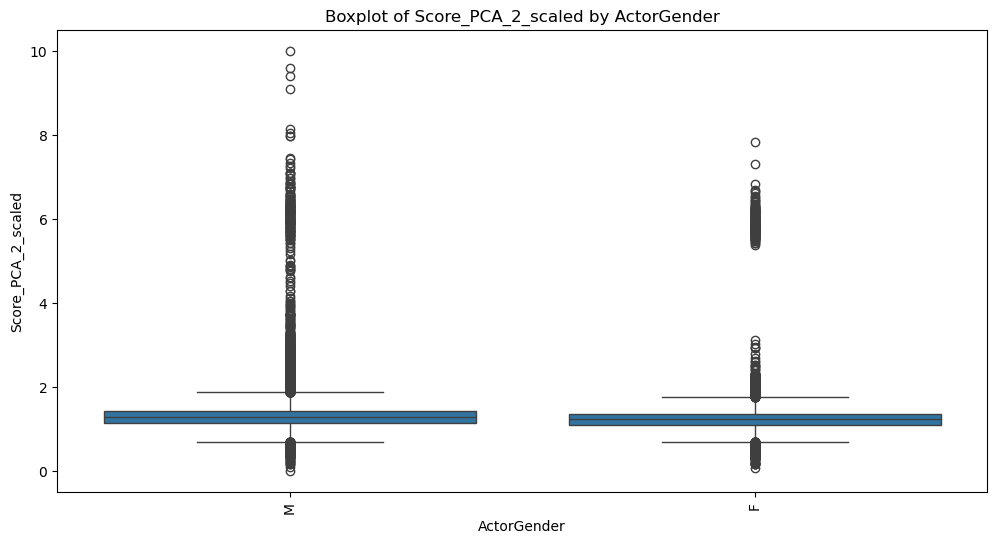

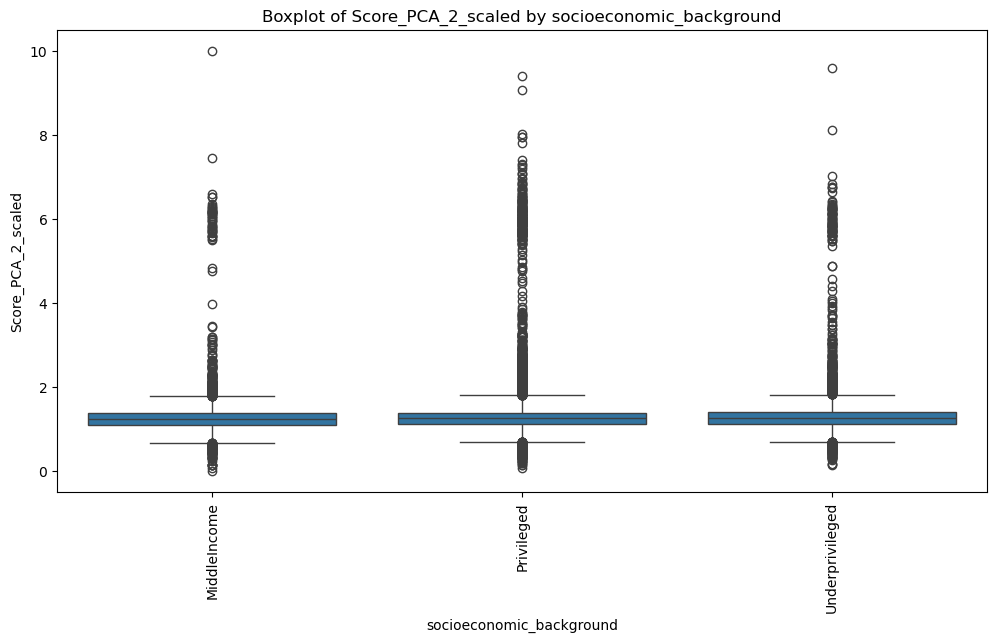

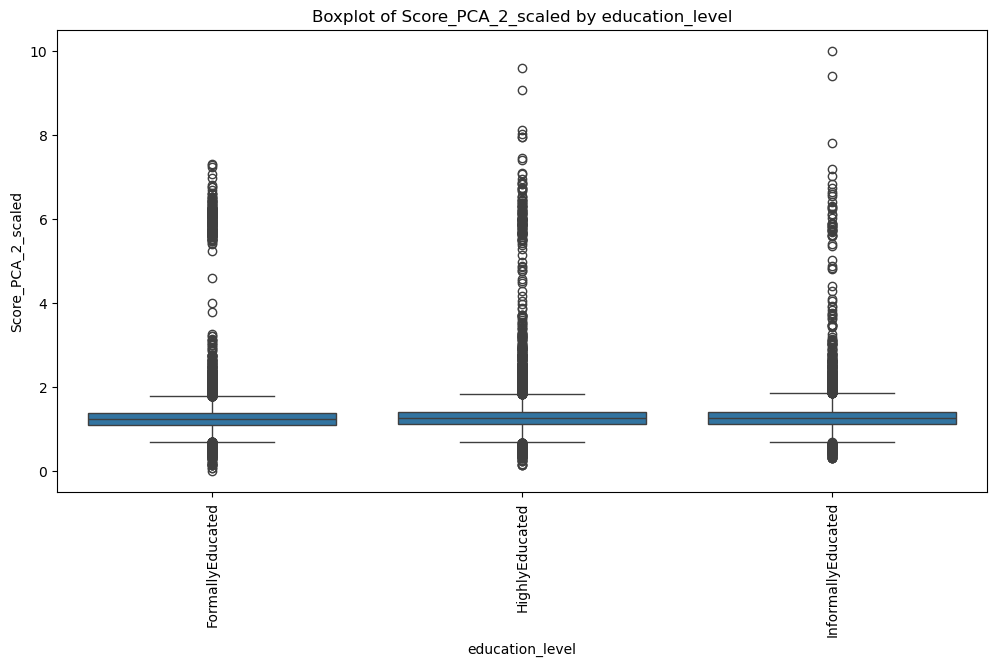

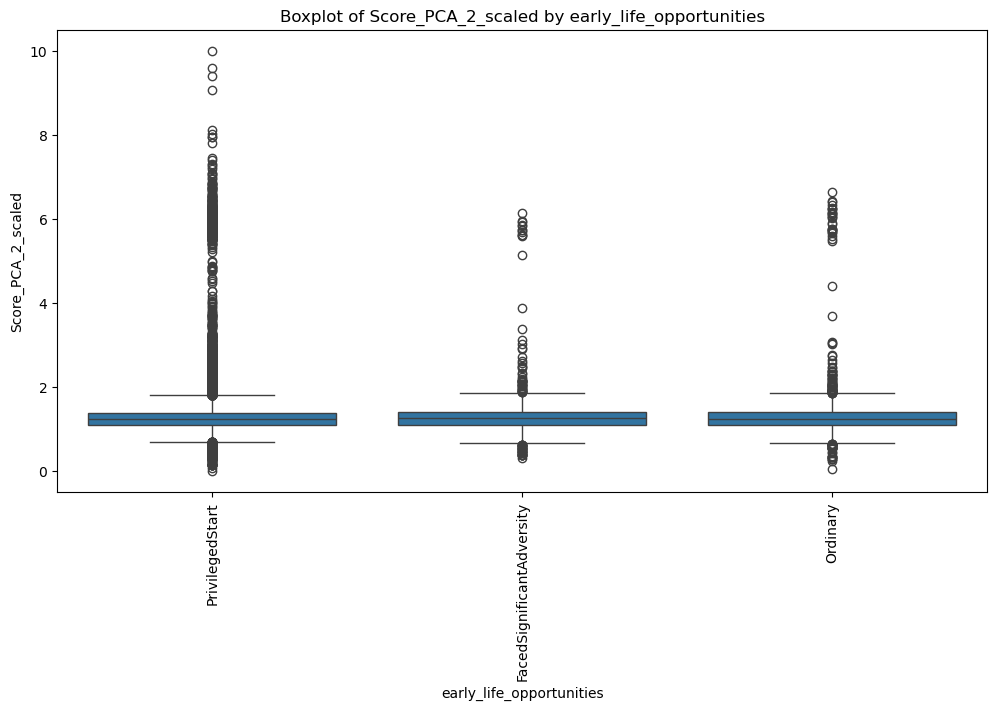

In [266]:
for feature in cat_features_withoutcelebA:
    plt.figure(figsize=(12, 6))  # Adjust figure size
    try:
        sns.boxplot(data=data, x=feature, y='Score_PCA_2_scaled')
        plt.xlabel(feature)
        plt.ylabel('Score_PCA_2_scaled')
        plt.title(f"Boxplot of Score_PCA_2_scaled by {feature}")
        plt.xticks(rotation=90)  # Rotate x-ticks for readability
        plt.show()
    except Exception as e:
        print(f"Could not plot boxplot for {feature}: {e}")

# Anova Test

In [267]:
data_anova = data.dropna()

In [268]:

# ANOVA for each categorical feature
for feature in cat_features:
    groups = [data_anova[data_anova[feature] == category]['Score_PCA_2_scaled'] 
              for category in data_anova[feature].unique()]
    f_stat, p_value = f_oneway(*groups)
    print(f"\n{feature}: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")



Arched_Eyebrows: F-statistic = 31.25, p-value = 0.0000

Attractive: F-statistic = 71.19, p-value = 0.0000

Bags_Under_Eyes: F-statistic = 42.70, p-value = 0.0000

Bald: F-statistic = 25.05, p-value = 0.0000

Bangs: F-statistic = 14.95, p-value = 0.0001

Big_Lips: F-statistic = 39.61, p-value = 0.0000

Big_Nose: F-statistic = 40.26, p-value = 0.0000

Black_Hair: F-statistic = 22.05, p-value = 0.0000

Blond_Hair: F-statistic = 7.54, p-value = 0.0060

Brown_Hair: F-statistic = 6.15, p-value = 0.0132

Bushy_Eyebrows: F-statistic = 4.49, p-value = 0.0341

Chubby: F-statistic = 17.89, p-value = 0.0000

Double_Chin: F-statistic = 34.94, p-value = 0.0000

Goatee: F-statistic = 3.31, p-value = 0.0691

Gray_Hair: F-statistic = 131.00, p-value = 0.0000

High_Cheekbones: F-statistic = 0.18, p-value = 0.6682

Male: F-statistic = 45.15, p-value = 0.0000

Mustache: F-statistic = 1.80, p-value = 0.1800

Narrow_Eyes: F-statistic = 0.01, p-value = 0.9224

No_Beard: F-statistic = 7.40, p-value = 0.0065


# Clustering
Main challenge : cathegorical data
K-means adapted to cathegorical data is Kmodes
K-prototypes can handle both, haven't used it yet
+ They both can't handle Nan so I am only working with a litle subset -> dropping Nan
### Elbow method to find optimal K - adapted for cathegorical data using Kmodes ( Huang initialisation / simple matching dissimilarity)

Elbow method usually uses sum of squares, here using cost because cath data

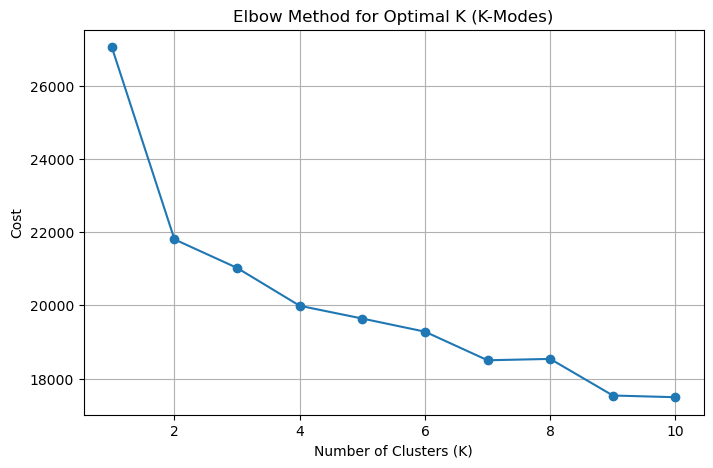

In [269]:
categorical_data = data[cat_features].dropna()

# Initialize variables for Elbow Method
cost = []
K_values = range(1, 11)  # Test K from 1 to 10

# Apply K-modes for different values of K
for K in K_values:
    km = KModes(n_clusters=K, init="Huang", n_init=5, random_state=42)
    km.fit(categorical_data)
    cost.append(km.cost_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_values, cost, marker="o")
plt.title("Elbow Method for Optimal K (K-Modes)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Cost")
plt.grid(True)
plt.show()


# Clustering K = 2,3,4

In [270]:
from kmodes.kmodes import KModes

# Drop rows with NaN values in relevant columns
clustering_data = data[cat_features].dropna()

# Check the data structure
print("Categorical Columns:", clustering_data.columns)

# Run KModes
kmodes = KModes(n_clusters=2, init='Cao', random_state=42)
clusters = kmodes.fit_predict(clustering_data)

# Add cluster assignments to the original DataFrame
data.loc[clustering_data.index, 'Cluster'] = clusters

print("KModes clustering completed successfully!")
print(data['Cluster'].value_counts())


Categorical Columns: Index(['Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs',
       'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Brown_Hair',
       'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Goatee', 'Gray_Hair',
       'High_Cheekbones', 'Male', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Straight_Hair', 'Wavy_Hair', 'ActorGender',
       'socioeconomic_background', 'education_level',
       'early_life_opportunities'],
      dtype='object')
KModes clustering completed successfully!
Cluster
0.0    2274
1.0    1665
Name: count, dtype: int64


In [271]:
mean_score_by_cluster = data.groupby('Cluster')['Score_PCA_2_scaled'].describe()
print("Mean Score by Cluster:")
print(mean_score_by_cluster)

Mean Score by Cluster:
          count      mean       std       min       25%       50%       75%  \
Cluster                                                                       
0.0      2274.0  1.426896  0.845052  0.217400  1.126996  1.280610  1.450819   
1.0      1665.0  1.634243  0.913301  0.521556  1.216310  1.413575  1.731616   

              max  
Cluster            
0.0      7.815470  
1.0      9.077111  


# Subset clustering

In [272]:
random_subset = data[features_using].dropna()
random_subset_clust = random_subset[cat_features_withoutcelebA]
random_subset_clust

,ActorGender,socioeconomic_background,education_level,early_life_opportunities
99,F,Underprivileged,InformallyEducated,Ordinary
104,F,Privileged,HighlyEducated,PrivilegedStart
107,M,Privileged,HighlyEducated,PrivilegedStart
129,M,Underprivileged,FormallyEducated,Ordinary
183,M,Underprivileged,InformallyEducated,PrivilegedStart
...,...,...,...,...
121016,F,Privileged,HighlyEducated,PrivilegedStart
121090,F,MiddleIncome,FormallyEducated,Ordinary
121103,M,Privileged,FormallyEducated,PrivilegedStart
121157,F,Underprivileged,FormallyEducated,PrivilegedStart


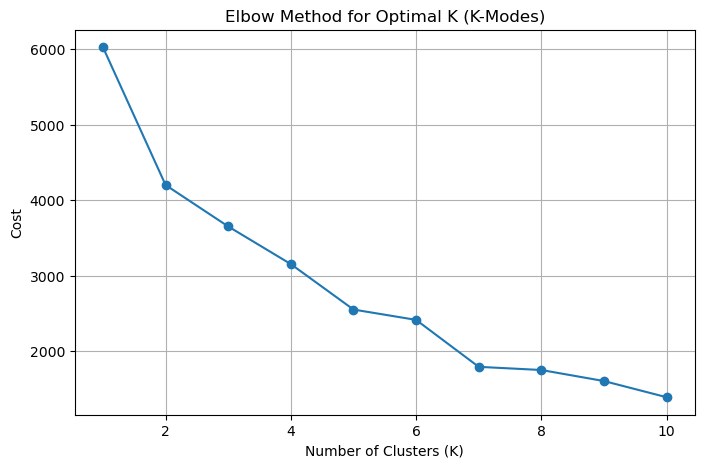

In [273]:
# Initialize variables for Elbow Method
cost = []
K_values = range(1, 11)  # Test K from 1 to 10

# Apply K-modes for different values of K
for K in K_values:
    km = KModes(n_clusters=K, init="Huang", n_init=5, random_state=42)
    km.fit(random_subset_clust)
    cost.append(km.cost_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_values, cost, marker="o")
plt.title("Elbow Method for Optimal K (K-Modes)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Cost")
plt.grid(True)
plt.show()


In [274]:
from kmodes.kmodes import KModes

# Check the data structure
print("Categorical Columns:", random_subset_clust.columns)

# Run KModes
kmodes = KModes(n_clusters=2, init='Cao', random_state=42)
clusters = kmodes.fit_predict(random_subset_clust)

# Add cluster assignments to the original DataFrame
random_subset.loc[random_subset.index, 'Cluster'] = clusters

print("KModes clustering completed successfully!")
print(random_subset['Cluster'].value_counts())


Categorical Columns: Index(['ActorGender', 'socioeconomic_background', 'education_level',
       'early_life_opportunities'],
      dtype='object')
KModes clustering completed successfully!
Cluster
0.0    2791
1.0    1148
Name: count, dtype: int64


In [275]:
random_subset['Score_PCA_2_scaled'].mean()


1.5145404495355765

In [276]:
mean_score_by_cluster = random_subset.groupby('Cluster')['Score_PCA_2_scaled'].describe()
print("Mean Score by Cluster:")
print(mean_score_by_cluster)

Mean Score by Cluster:
          count      mean       std       min       25%       50%       75%  \
Cluster                                                                       
0.0      2791.0  1.490792  0.890863  0.217400  1.138370  1.308346  1.522207   
1.0      1148.0  1.572276  0.852111  0.260752  1.200395  1.374186  1.648089   

              max  
Cluster            
0.0      7.815470  
1.0      9.077111  


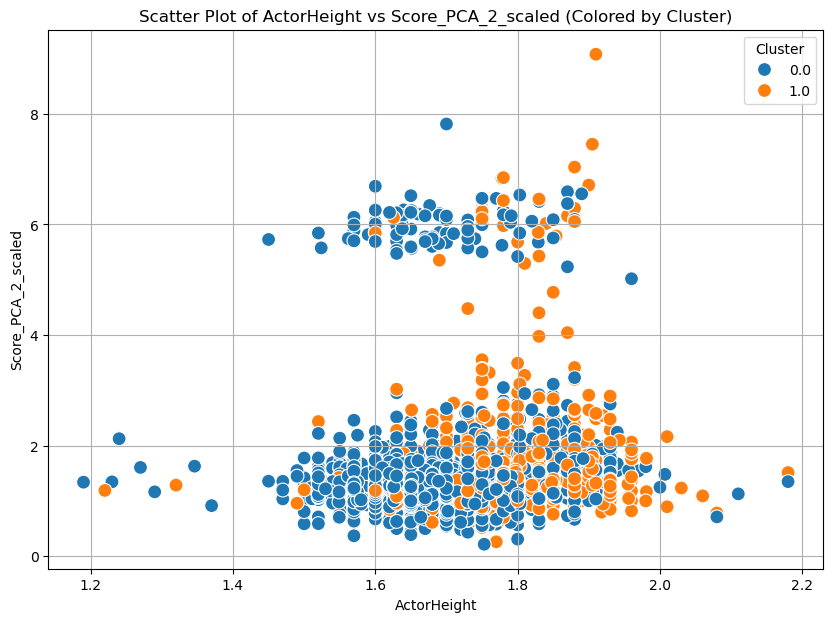

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'ActorHeight' and 'Score' with the actual numerical columns you want to plot
x_feature = 'ActorHeight'  # Feature for the x-axis
y_feature = 'Score_PCA_2_scaled'        # Feature for the y-axis

# Scatter Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=random_subset, x=x_feature, y=y_feature, hue='Cluster', palette='tab10', s=100)
plt.title(f"Scatter Plot of {x_feature} vs {y_feature} (Colored by Cluster)")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


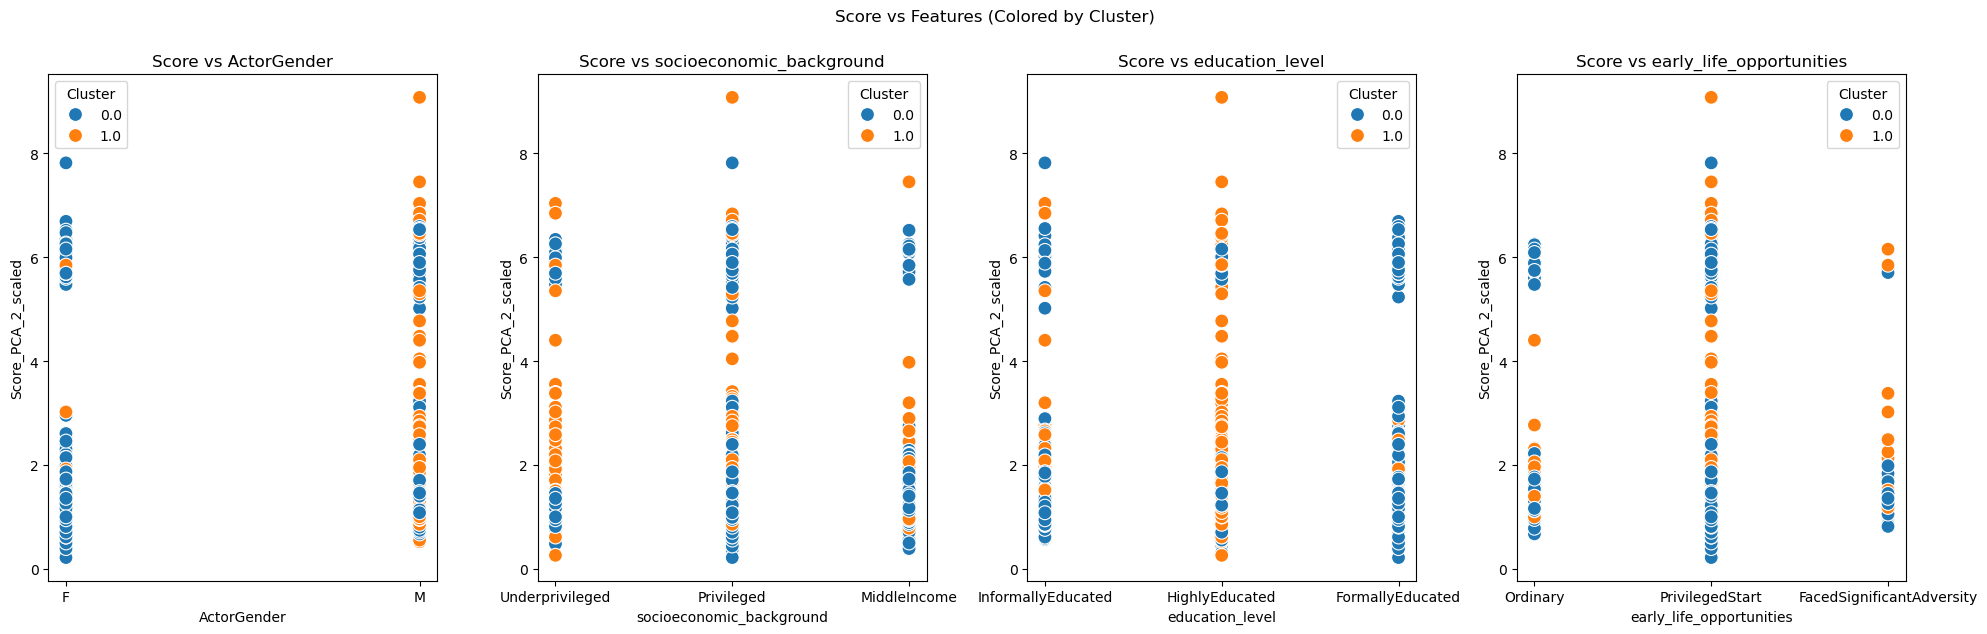

In [278]:
# Define the features and score column
features = ['ActorGender', 'socioeconomic_background', 'education_level', 'early_life_opportunities']  # Replace with your feature column names
score_column = 'Score_PCA_2_scaled'  # Replace with your score column name

# Prepare figure for subplots
fig, axes = plt.subplots(1, len(features), figsize=(20, 6))  # One row, multiple columns
axes = axes.flatten()

# Create scatter plots for each feature
for i, feature in enumerate(features):
    sns.scatterplot(ax=axes[i], 
                    x=random_subset[feature], 
                    y=random_subset[score_column], 
                    hue=random_subset['Cluster'], 
                    palette='tab10', 
                    s=100)
    axes[i].set_title(f"Score vs {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(score_column)
    axes[i].legend(title="Cluster")

# Adjust layout
plt.tight_layout()
plt.suptitle("Score vs Features (Colored by Cluster)", y=1.05)
plt.show()

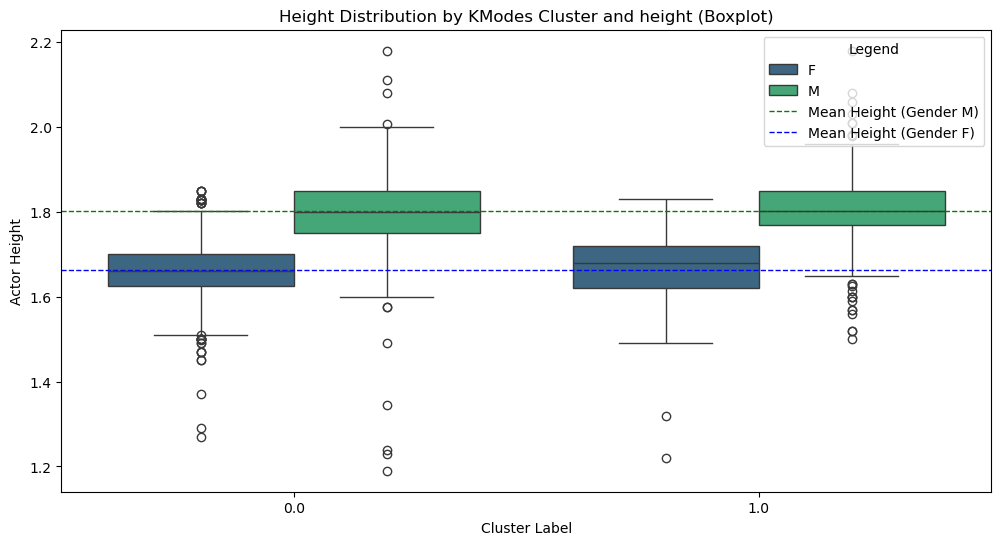

In [350]:

# Filter out noise if necessary (KModes does not naturally include noise points)
# Calculate means for ActorGender_F (0 and 1) across all clusters
mean_height_gender_0 = random_subset[random_subset['ActorGender'] == 'M']['ActorHeight'].mean()
mean_height_gender_1 = random_subset[random_subset['ActorGender'] == 'F']['ActorHeight'].mean()

# Create a boxplot for height by cluster and gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=random_subset, x='Cluster', y='ActorHeight', hue='ActorGender', palette='viridis')

# Add mean lines
plt.axhline(mean_height_gender_0, color='green', linestyle='--', linewidth=1, label='Mean Height (Gender M)')
plt.axhline(mean_height_gender_1, color='blue', linestyle='--', linewidth=1, label='Mean Height (Gender F)')

# Add plot details
plt.title("Height Distribution by KModes Cluster and height (Boxplot)")
plt.xlabel("Cluster Label")
plt.ylabel("Actor Height")
plt.legend(title="Legend", loc='upper right')
plt.show()


## Feature importance - after clustering

In [279]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Prepare data for model
X = random_subset.drop(columns=['Cluster', 'Score_PCA_2_scaled']).dropna()  # Features
y = random_subset['Cluster'].dropna()  # Cluster labels

# Convert categorical features to dummy variables (if needed)
X_encoded = pd.get_dummies(X, drop_first=True)

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_encoded, y)

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)


Feature Importances:
                                     Feature  Importance
32            education_level_HighlyEducated    0.288281
31  socioeconomic_background_Underprivileged    0.168459
29                             ActorGender_M    0.136814
16                                      Male    0.096924
30       socioeconomic_background_Privileged    0.077931
28                               ActorHeight    0.064981
33        education_level_InformallyEducated    0.025483
19                                  No_Beard    0.018544
1                                 Attractive    0.011807
6                                   Big_Nose    0.007645
0                            Arched_Eyebrows    0.006687
35  early_life_opportunities_PrivilegedStart    0.006339
27                                 Wavy_Hair    0.006007
15                           High_Cheekbones    0.005750
8                                 Blond_Hair    0.005473
10                            Bushy_Eyebrows    0.004965
22        

C:\Users\HP\AppData\Local\Temp\ipykernel_13928\1059710496.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


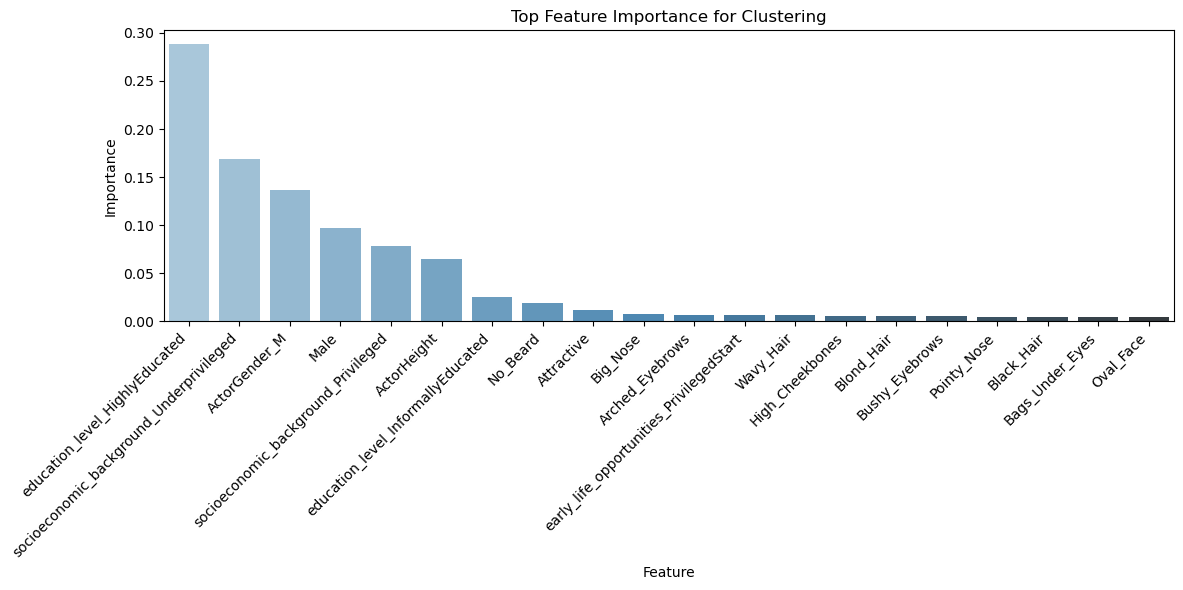

In [280]:
import matplotlib.pyplot as plt

# Assuming 'feature_importance' is a DataFrame with 'Feature' and 'Importance' columns
# Sort features by importance
feature_importance = feature_importances.sort_values(by='Importance', ascending=False)

# Select top N features for better visibility
top_n = 20
top_features = feature_importance.head(top_n)

# Plot improved feature importance chart
plt.figure(figsize=(12, 6))  # Adjust figure size
sns.barplot(
    x='Feature', 
    y='Importance', 
    data=top_features, 
    palette='Blues_d'
)

# Improve x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add title and labels
plt.title("Top Feature Importance for Clustering")
plt.xlabel("Feature")
plt.ylabel("Importance")

plt.tight_layout()  # Adjust layout to prevent cutoff
plt.show()


# Visualisation

## boxplots

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns


# Box plots for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        x=feature, 
        y='Score_PCA_2_scaled', 
        hue='Cluster', 
        data=data, 
        palette= 'tab10'
    )
    plt.title(f"Score Distribution by {feature} and Clusters")
    plt.xticks(rotation=45)
    plt.legend(title="Cluster")
    plt.show()


NameError: name 'categorical_features' is not defined

## histograms

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze each column based on its type
categorical_columns = ['ActorGender', 'socioeconomic_background',
                       'education_level', 'early_life_opportunities']

# Plot categorical features as proportions for each cluster
for feature in categorical_columns:
    # Calculate proportions
    cluster_counts = random_subset.groupby(['Cluster', feature]).size().reset_index(name='count')
    cluster_totals = cluster_counts.groupby('Cluster')['count'].transform('sum')
    cluster_counts['proportion'] = cluster_counts['count'] / cluster_totals

    # Plot proportions
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Cluster', y='proportion', hue=feature, data=cluster_counts)
    plt.title(f"Proportion of {feature} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Proportion")
    plt.legend(title=feature)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.show()


# Playing around with heatmaps

## with clusters

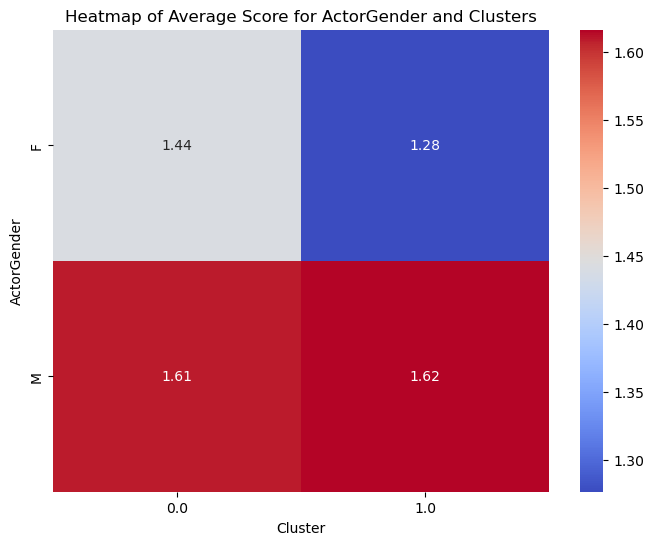

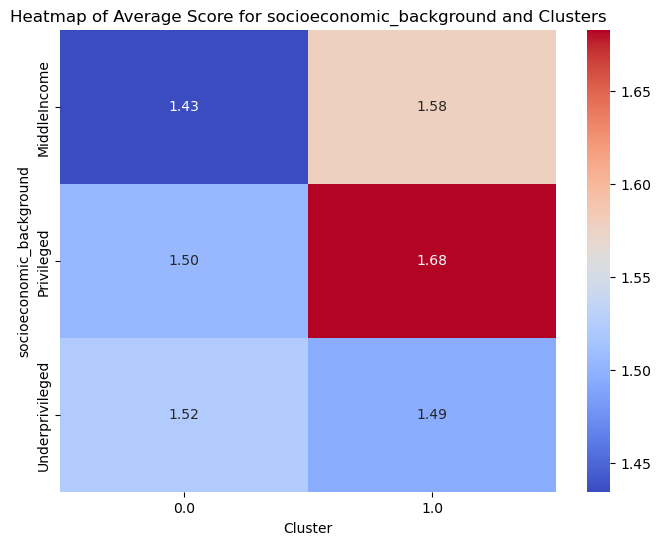

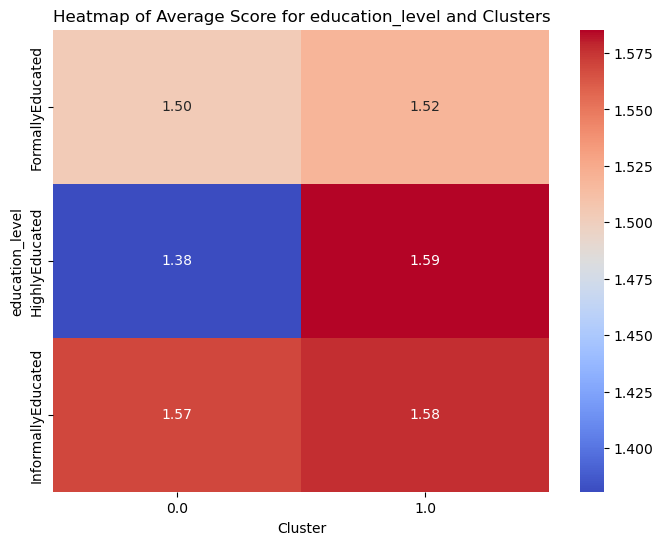

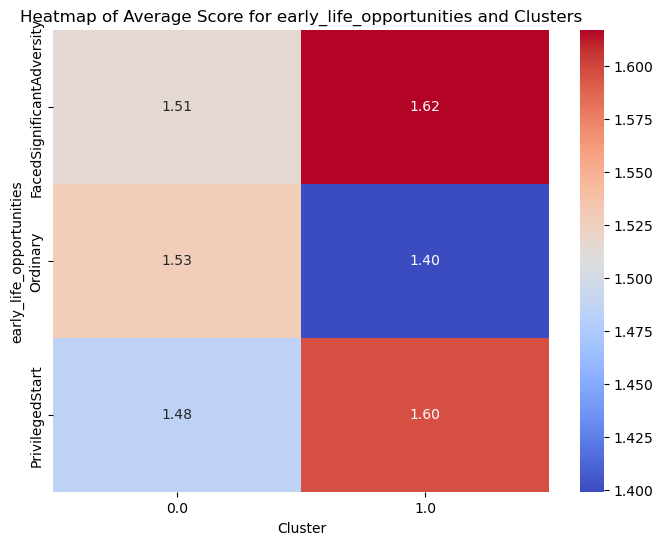

In [282]:
for feature in cat_features_withoutcelebA:
    heatmap_data = random_subset.groupby([feature, 'Cluster'])['Score_PCA_2_scaled'].mean().unstack().fillna(0)

    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Heatmap of Average Score for {feature} and Clusters")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
    plt.show()


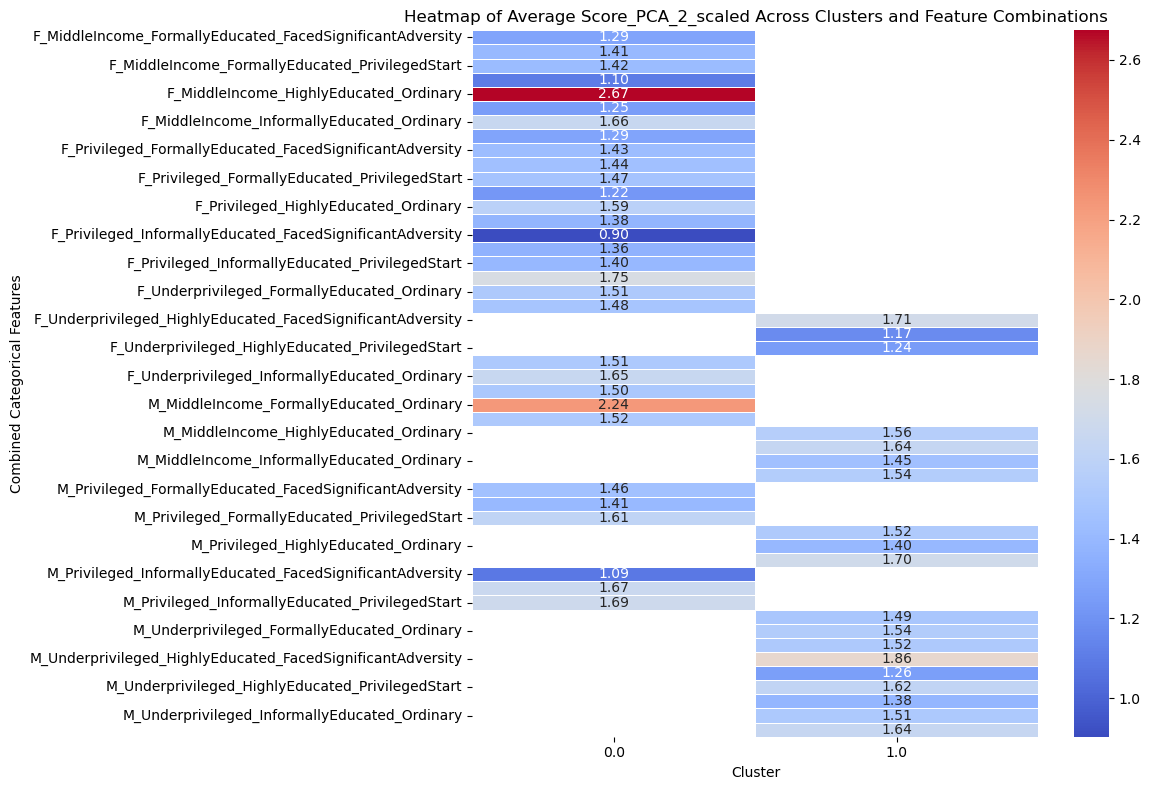

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all categorical features into a single column
random_subset['Combined_Features'] = random_subset['ActorGender'].astype(str) + "_" + \
                          random_subset['socioeconomic_background'].astype(str) + "_" + \
                          random_subset['education_level'].astype(str) + "_" + \
                          random_subset['early_life_opportunities'].astype(str)

# Group data by combined features and clusters to calculate average 'Score_PCA_2_scaled'
grouped_avg_score = random_subset.groupby(['Combined_Features', 'Cluster'])['Score_PCA_2_scaled'].mean().reset_index()

# Pivot table for heatmap
pivot_avg_score = grouped_avg_score.pivot(index='Combined_Features', columns='Cluster', values='Score_PCA_2_scaled')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_avg_score, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Heatmap of Average Score_PCA_2_scaled Across Clusters and Feature Combinations")
plt.xlabel("Cluster")
plt.ylabel("Combined Categorical Features")
plt.tight_layout()
plt.show()


## without clusters

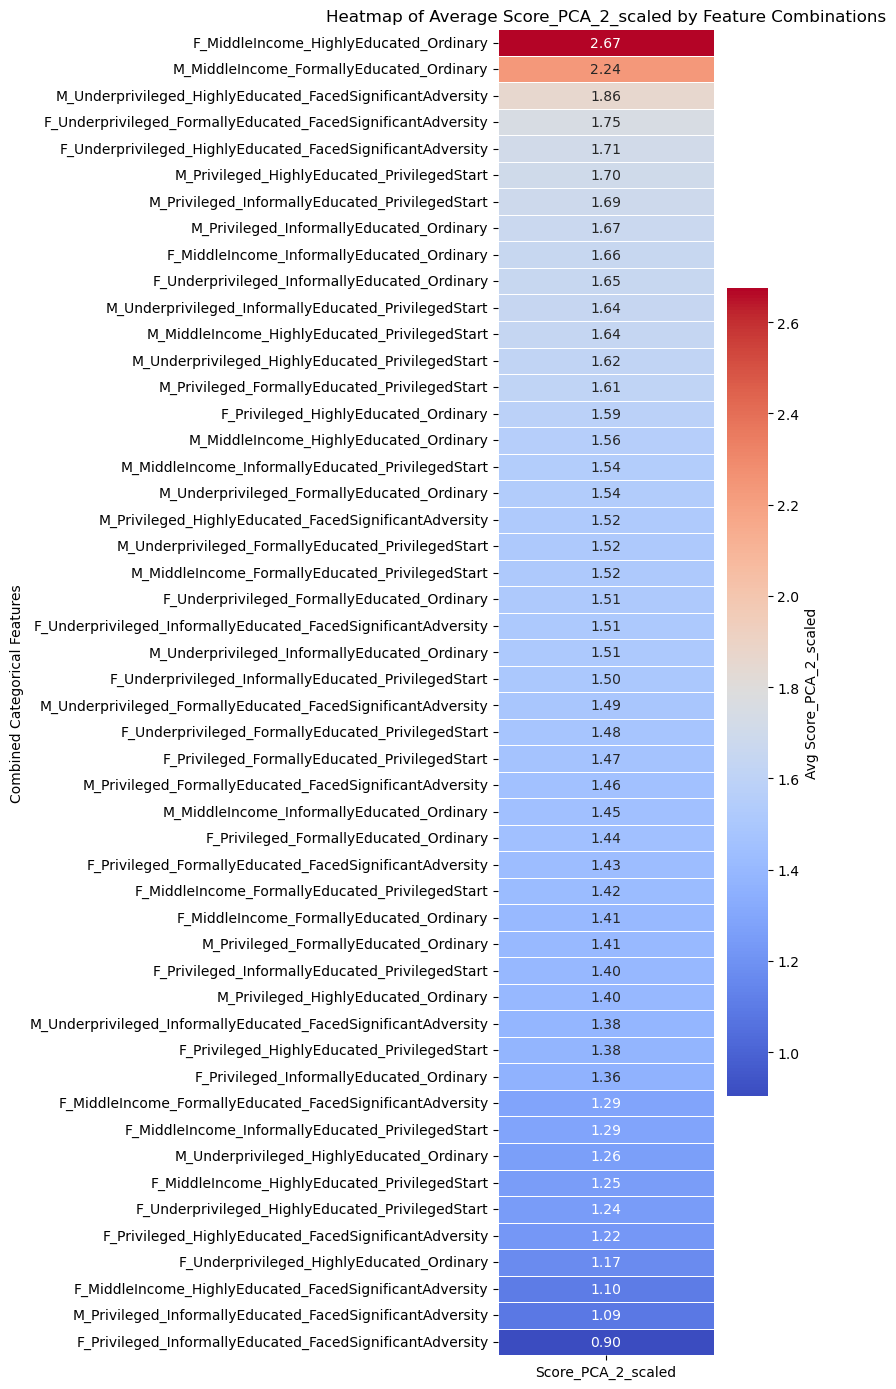

In [284]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all categorical features into a single column
random_subset['Combined_Features'] = random_subset['ActorGender'].astype(str) + "_" + \
                          random_subset['socioeconomic_background'].astype(str) + "_" + \
                          random_subset['education_level'].astype(str) + "_" + \
                          random_subset['early_life_opportunities'].astype(str)

# Group by combined features and calculate average Score_PCA_2_scaled
grouped_avg_score = random_subset.groupby('Combined_Features')['Score_PCA_2_scaled'].mean().reset_index()

# Sort the data by average score
grouped_avg_score = grouped_avg_score.sort_values(by='Score_PCA_2_scaled', ascending=False)

# Create a heatmap-friendly DataFrame with Combined Features as the index
heatmap_data = grouped_avg_score.set_index('Combined_Features')

# Plot the heatmap
plt.figure(figsize=(8, 14))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Avg Score_PCA_2_scaled'})

plt.title("Heatmap of Average Score_PCA_2_scaled by Feature Combinations")
plt.xlabel("")  # No need for x-axis label
plt.ylabel("Combined Categorical Features")
plt.tight_layout()
plt.show()


In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical features


# Combine all categorical features into a single column
random_subset['Combined_Features'] = random_subset[cat_features].astype(str).agg('_'.join, axis=1)

# Group by the combined features and calculate average Score_PCA_2_scaled
grouped_avg_score = (
    random_subset
    .groupby('Combined_Features', as_index=False)
    .agg(
        Average_Score=('Score_PCA_2_scaled', 'mean'),
        Actor_Count=('Combined_Features', 'size')  # Count the number of rows per group
    )
)

# Drop rows where Actor_Count is smaller than 5
grouped_avg_score = grouped_avg_score[grouped_avg_score['Actor_Count'] >= 5]

# Sort the data by average score for better visualization
grouped_avg_score = grouped_avg_score.sort_values(by='Average_Score', ascending=False)



C:\Users\HP\AppData\Local\Temp\ipykernel_13928\1056117044.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


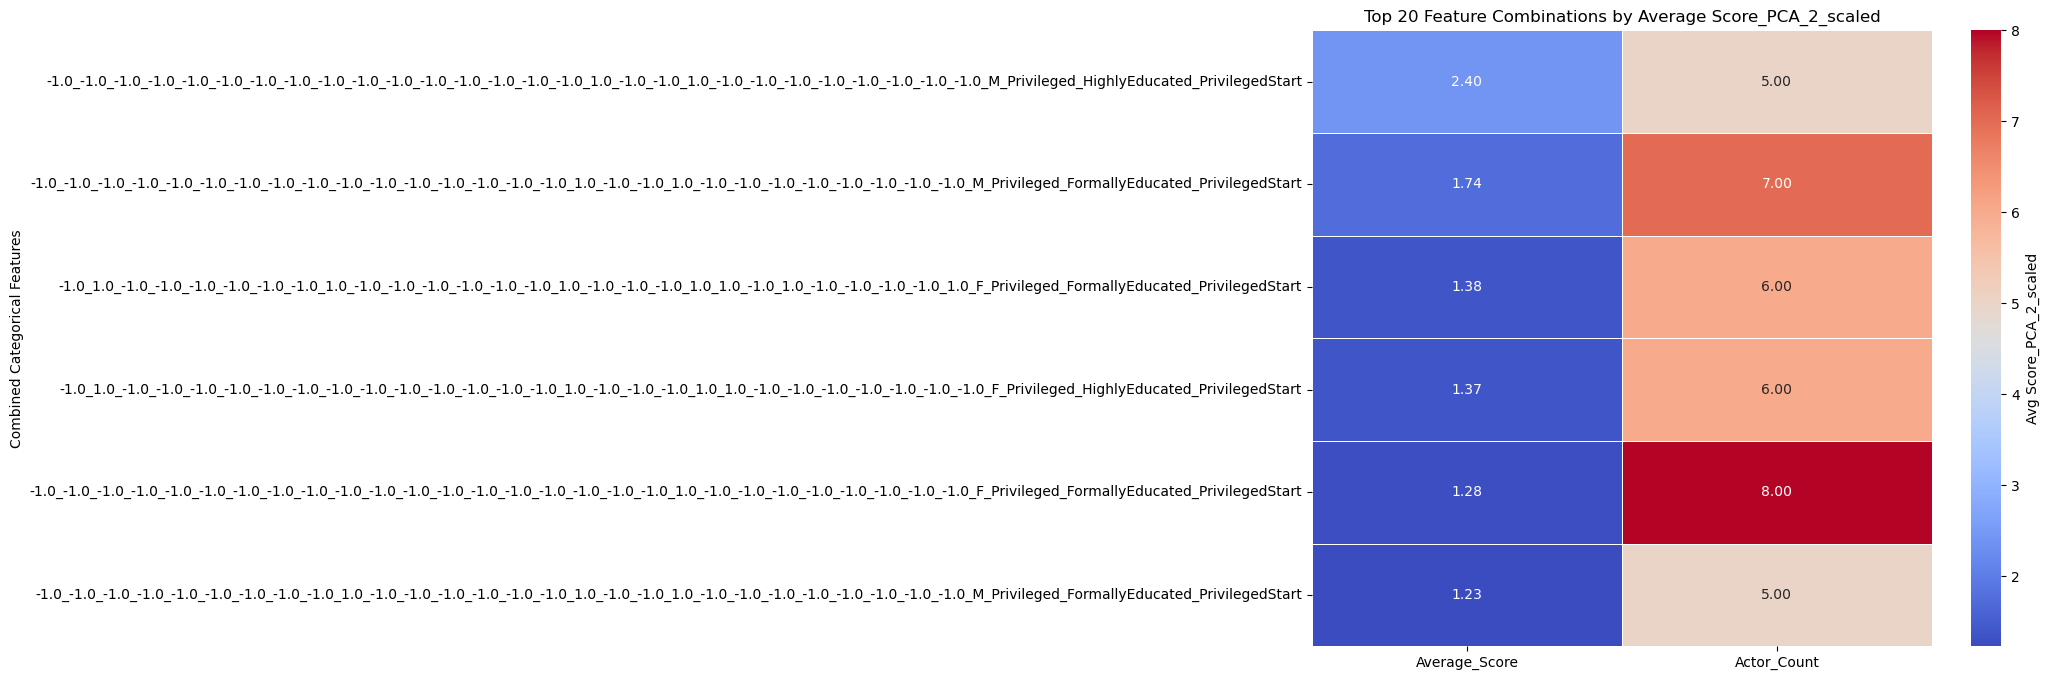

In [286]:
# Keep only the top N combinations
N = 20  # Adjust as needed
top_combos = grouped_avg_score.nlargest(N, 'Average_Score')

# Plot the heatmap with top-N combinations
plt.figure(figsize=(10, 8))
sns.heatmap(top_combos.set_index('Combined_Features'), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            cbar_kws={'label': 'Avg Score_PCA_2_scaled'})

plt.title(f"Top {N} Feature Combinations by Average Score_PCA_2_scaled")
plt.xlabel("")
plt.ylabel("Combined Categorical Features")
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_13928\1054264291.py:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


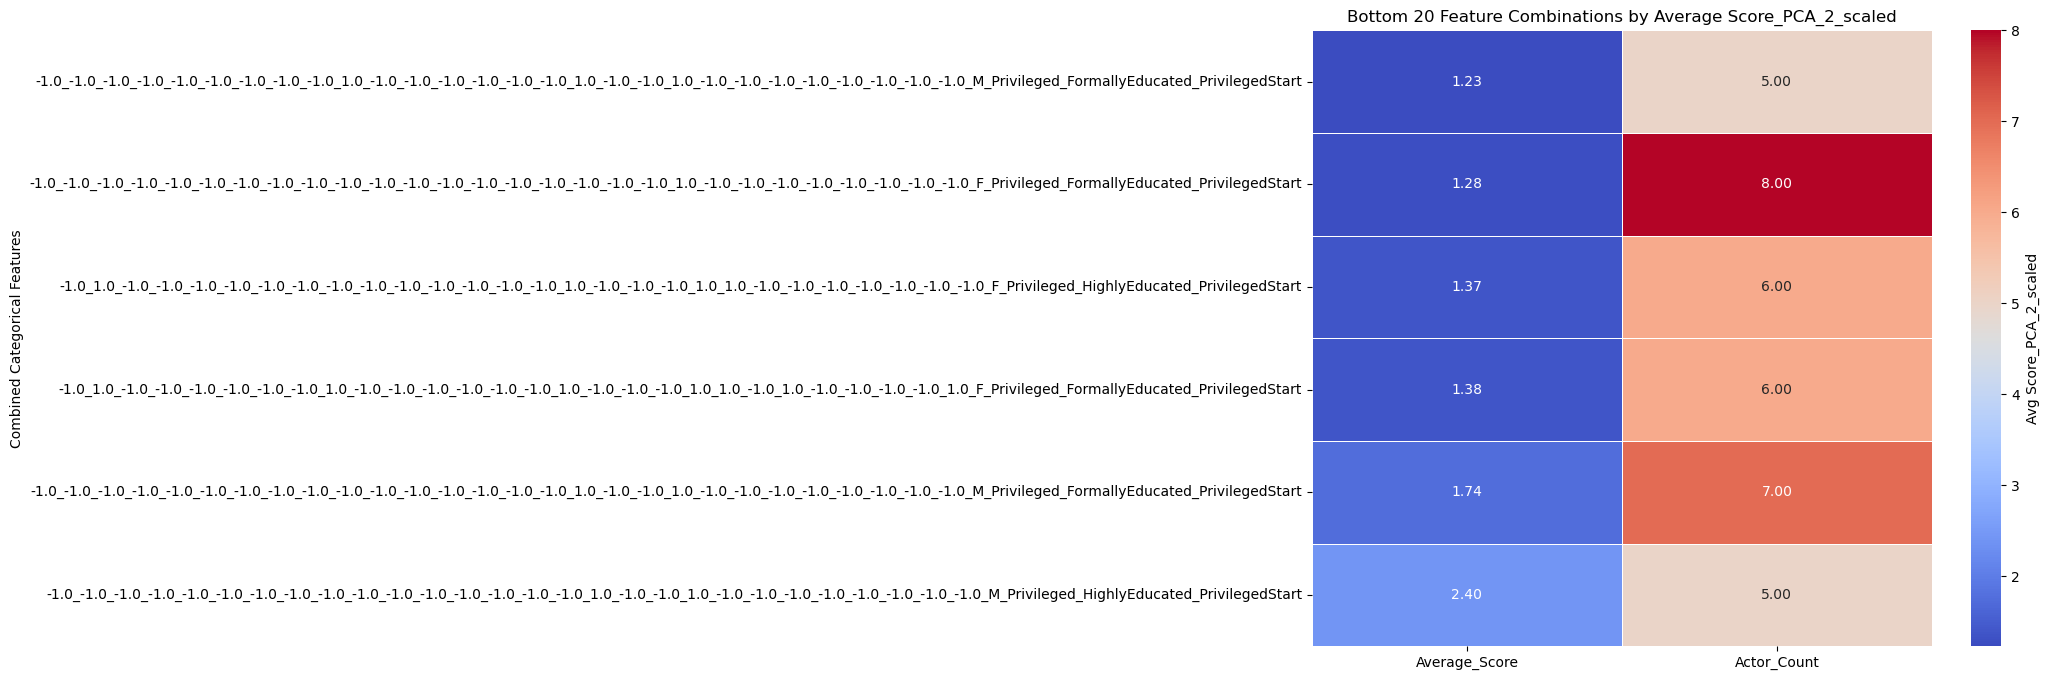

In [287]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define N (number of worst combinations to display)
N = 20  # Adjust this value as needed

# Get the bottom N combinations with the lowest average scores
bottom_combos = grouped_avg_score.nsmallest(N, 'Average_Score')

# Plot the heatmap with bottom-N combinations
plt.figure(figsize=(10, 8))
sns.heatmap(bottom_combos.set_index('Combined_Features'), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            cbar_kws={'label': 'Avg Score_PCA_2_scaled'})

plt.title(f"Bottom {N} Feature Combinations by Average Score_PCA_2_scaled")
plt.xlabel("")  # No x-axis label
plt.ylabel("Combined Categorical Features")
plt.tight_layout()
plt.show()


In [288]:
grouped_avg_score.columns

Index(['Combined_Features', 'Average_Score', 'Actor_Count'], dtype='object')

In [289]:

# Split the Combined_Features back into individual feature columns
split_features = grouped_avg_score['Combined_Features'].str.split('_', expand=True)

# Assign original column names to the split columns
split_features.columns = cat_features

# Concatenate the split columns with the average score
final_df = pd.concat([split_features, grouped_avg_score['Average_Score'], grouped_avg_score['Actor_Count']], axis=1)

# Sort the final DataFrame by average score
final_df = final_df.sort_values(by='Average_Score', ascending=True)

# Display the final DataFrame
final_df


,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Brown_Hair,...,Rosy_Cheeks,Sideburns,Straight_Hair,Wavy_Hair,ActorGender,socioeconomic_background,education_level,early_life_opportunities,Average_Score,Actor_Count
266,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,M,Privileged,FormallyEducated,PrivilegedStart,1.232221,5
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,F,Privileged,FormallyEducated,PrivilegedStart,1.276031,8
1664,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,F,Privileged,HighlyEducated,PrivilegedStart,1.368368,6
2005,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,1.0,F,Privileged,FormallyEducated,PrivilegedStart,1.380779,6
50,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,M,Privileged,FormallyEducated,PrivilegedStart,1.738754,7
52,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,M,Privileged,HighlyEducated,PrivilegedStart,2.403429,5


In [290]:
# Get the 10 best combinations (highest average score)
top_3_combinations = final_df.nlargest(3, 'Average_Score')

# Get the 10 worst combinations (lowest average score)
bottom_3_combinations = final_df.nsmallest(3, 'Average_Score')




In [291]:
# Display the DataFrames
print("Top 3 Combinations:")
top_3_combinations



Top 3 Combinations:


,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Brown_Hair,...,Rosy_Cheeks,Sideburns,Straight_Hair,Wavy_Hair,ActorGender,socioeconomic_background,education_level,early_life_opportunities,Average_Score,Actor_Count
52,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,M,Privileged,HighlyEducated,PrivilegedStart,2.403429,5
50,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,M,Privileged,FormallyEducated,PrivilegedStart,1.738754,7
2005,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,1.0,F,Privileged,FormallyEducated,PrivilegedStart,1.380779,6


In [292]:
print("\nBottom 3 Combinations:")
bottom_3_combinations


Bottom 3 Combinations:


,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Brown_Hair,...,Rosy_Cheeks,Sideburns,Straight_Hair,Wavy_Hair,ActorGender,socioeconomic_background,education_level,early_life_opportunities,Average_Score,Actor_Count
266,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,M,Privileged,FormallyEducated,PrivilegedStart,1.232221,5
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,F,Privileged,FormallyEducated,PrivilegedStart,1.276031,8
1664,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,F,Privileged,HighlyEducated,PrivilegedStart,1.368368,6


In [293]:
# Define the binary attribute columns
binary_features = ['Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs',
                   'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Brown_Hair',
                   'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Goatee', 'Gray_Hair',
                   'High_Cheekbones', 'Male', 'Mustache', 'Narrow_Eyes', 'No_Beard',
                   'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
                   'Rosy_Cheeks', 'Sideburns', 'Straight_Hair', 'Wavy_Hair']

# Define the descriptive feature columns
descriptive_features = ['ActorGender', 'socioeconomic_background', 'education_level', 'early_life_opportunities']

In [294]:
# Ensure binary features are integers
top_3_combinations[binary_features] = top_3_combinations[binary_features].astype(float)

# Loop through the top 3 combinations
for i in range(3):
    # Extract the current actor (row)
    actor = top_3_combinations.iloc[i]
    
    # Find binary features equal to 1
    successful_attributes = [feature for feature in binary_features if actor[feature] == 1]
    
    # Extract descriptive features
    successful_descriptions = {feature: actor[feature] for feature in descriptive_features}
    
    # Print the description for the current actor
    print(f"\nTop {i+1} Successful Actor:")
    print("The most successful actors have:")
    if successful_attributes:
        print(", ".join(successful_attributes) + ".")
    else:
        print("No binary attributes equal to 1.")
    print(f"They are {successful_descriptions['ActorGender']}, "
          f"come from a {successful_descriptions['socioeconomic_background']} background, "
          f"have an education level of {successful_descriptions['education_level']}, "
          f"and had {successful_descriptions['early_life_opportunities']}.")



Top 1 Successful Actor:
The most successful actors have:
Male, No_Beard.
They are M, come from a Privileged background, have an education level of HighlyEducated, and had PrivilegedStart.

Top 2 Successful Actor:
The most successful actors have:
Male, No_Beard.
They are M, come from a Privileged background, have an education level of FormallyEducated, and had PrivilegedStart.

Top 3 Successful Actor:
The most successful actors have:
Attractive, Blond_Hair, High_Cheekbones, No_Beard, Oval_Face, Pointy_Nose, Wavy_Hair.
They are F, come from a Privileged background, have an education level of FormallyEducated, and had PrivilegedStart.


# HOT ENCODING

In [295]:
hot_encoded = pd.get_dummies(data[features_using].dropna())

In [296]:
hot_encoded.columns

Index(['Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs',
       'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Brown_Hair',
       'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Goatee', 'Gray_Hair',
       'High_Cheekbones', 'Male', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Straight_Hair', 'Wavy_Hair',
       'Score_PCA_2_scaled', 'ActorHeight', 'ActorGender_F', 'ActorGender_M',
       'socioeconomic_background_MiddleIncome',
       'socioeconomic_background_Privileged',
       'socioeconomic_background_Underprivileged',
       'education_level_FormallyEducated', 'education_level_HighlyEducated',
       'education_level_InformallyEducated',
       'early_life_opportunities_FacedSignificantAdversity',
       'early_life_opportunities_Ordinary',
       'early_life_opportunities_PrivilegedStart'],
      dtype='object')

In [297]:
# List of columns to convert
columns_to_convert = ['Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs',
       'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Brown_Hair',
       'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Goatee', 'Gray_Hair',
       'High_Cheekbones', 'Male', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Straight_Hair', 'Wavy_Hair']  # Replace with actual column names

# Convert 1 to True and -1 to False
hot_encoded[columns_to_convert] = hot_encoded[columns_to_convert].replace({1: True, -1: False})



C:\Users\HP\AppData\Local\Temp\ipykernel_13928\1071689884.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hot_encoded[columns_to_convert] = hot_encoded[columns_to_convert].replace({1: True, -1: False})


In [298]:
hot_encoded = hot_encoded.replace({True: 1, False: 0})
hot_encoded = hot_encoded.replace({'M': 1, 'F': 0})



C:\Users\HP\AppData\Local\Temp\ipykernel_13928\2318263447.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hot_encoded = hot_encoded.replace({True: 1, False: 0})


In [299]:
hot_encoded.columns

Index(['Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs',
       'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Brown_Hair',
       'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Goatee', 'Gray_Hair',
       'High_Cheekbones', 'Male', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Straight_Hair', 'Wavy_Hair',
       'Score_PCA_2_scaled', 'ActorHeight', 'ActorGender_F', 'ActorGender_M',
       'socioeconomic_background_MiddleIncome',
       'socioeconomic_background_Privileged',
       'socioeconomic_background_Underprivileged',
       'education_level_FormallyEducated', 'education_level_HighlyEducated',
       'education_level_InformallyEducated',
       'early_life_opportunities_FacedSignificantAdversity',
       'early_life_opportunities_Ordinary',
       'early_life_opportunities_PrivilegedStart'],
      dtype='object')

Text(0, 0.5, 'Silhouette score')

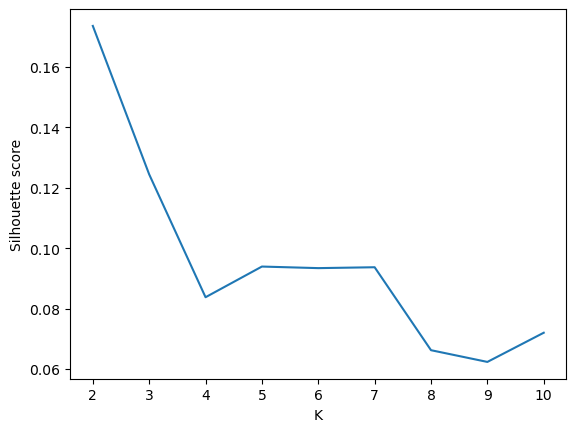

In [300]:
silhouettes = []
X = hot_encoded.drop(columns=['Score_PCA_2_scaled'])

# Try multiple k
for k in range(2, 11):
    # Cluster the data and assigne the labels
    labels = KMeans(n_clusters=k, random_state=10).fit_predict(X)
    # Get the Silhouette score
    score = silhouette_score(X, labels)
    silhouettes.append({"k": k, "score": score})
    
# Convert to dataframe
silhouettes = pd.DataFrame(silhouettes)

# Plot the data
plt.plot(silhouettes.k, silhouettes.score)
plt.xlabel("K")
plt.ylabel("Silhouette score")

In [303]:
# Step 2: Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(hot_encoded)

# Step 4: Apply KMeans Clustering with Optimal k (Assume 3 for this example)
n_clusters = 3  # Replace with the optimal k determined from the elbow plot
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Step 5: Add Cluster Labels to the Original Data
hot_encoded['Cluster'] = clusters


# Check Cluster Counts
print("\nCluster Sizes:")
print(hot_encoded['Cluster'].value_counts())




Cluster Sizes:
Cluster
1    1726
2    1602
0     611
Name: count, dtype: int64


In [304]:
mean_score_by_cluster = hot_encoded.groupby('Cluster')['Score_PCA_2_scaled'].describe()
print("Mean Score by Cluster:")
print(mean_score_by_cluster)

Mean Score by Cluster:
          count      mean       std       min       25%       50%       75%  \
Cluster                                                                       
0         611.0  1.505100  0.872404  0.666848  1.159886  1.335556  1.549716   
1        1726.0  1.410446  0.851249  0.217400  1.117586  1.270170  1.429322   
2        1602.0  1.630293  0.900418  0.521556  1.219998  1.409301  1.731880   

              max  
Cluster            
0        6.252135  
1        7.815470  
2        9.077111  


In [306]:
hot_encoded.columns

Index(['Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs',
       'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Brown_Hair',
       'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Goatee', 'Gray_Hair',
       'High_Cheekbones', 'Male', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Straight_Hair', 'Wavy_Hair',
       'Score_PCA_2_scaled', 'ActorHeight', 'ActorGender_F', 'ActorGender_M',
       'socioeconomic_background_MiddleIncome',
       'socioeconomic_background_Privileged',
       'socioeconomic_background_Underprivileged',
       'education_level_FormallyEducated', 'education_level_HighlyEducated',
       'education_level_InformallyEducated',
       'early_life_opportunities_FacedSignificantAdversity',
       'early_life_opportunities_Ordinary',
       'early_life_opportunities_PrivilegedStart', 'Cluster'],
      dtype='object')

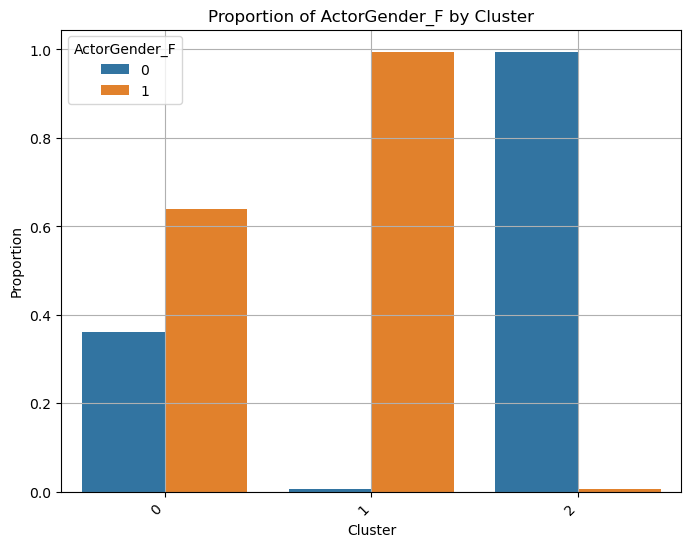

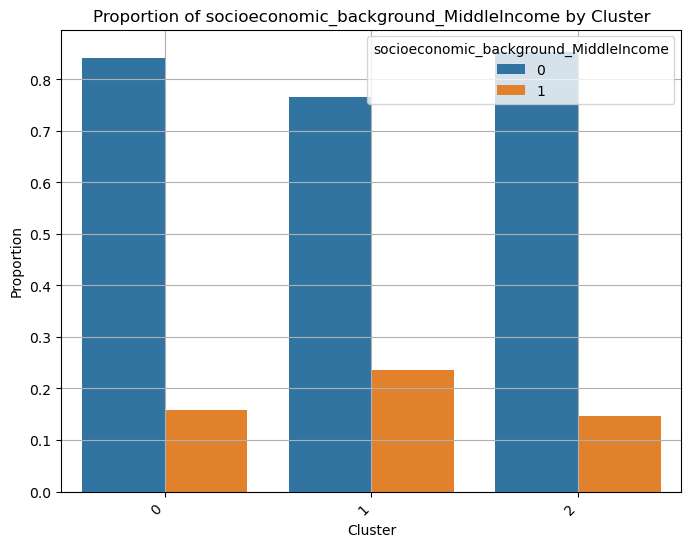

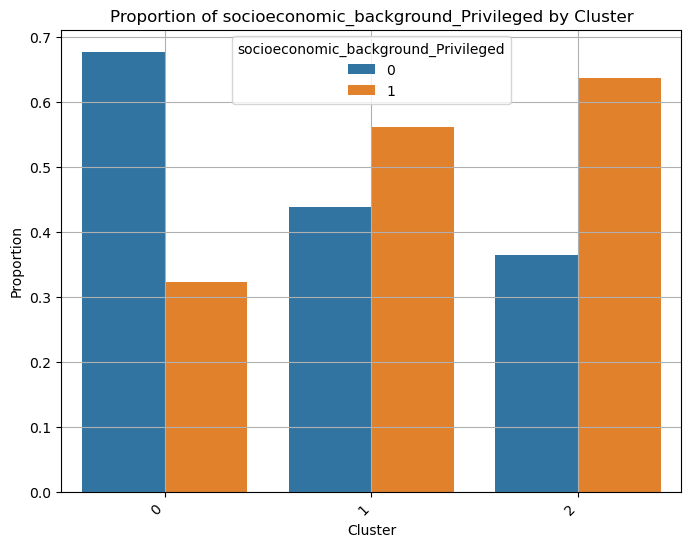

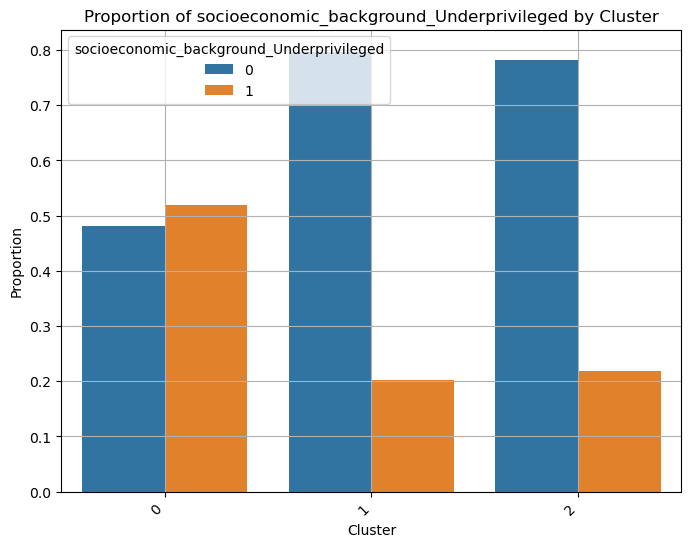

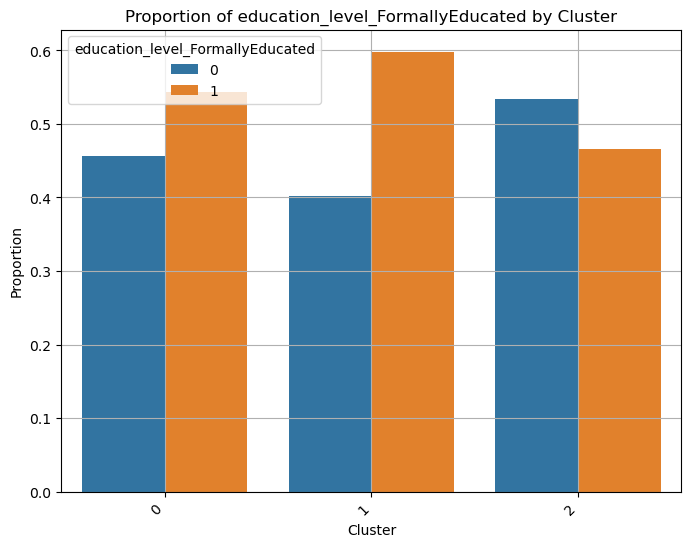

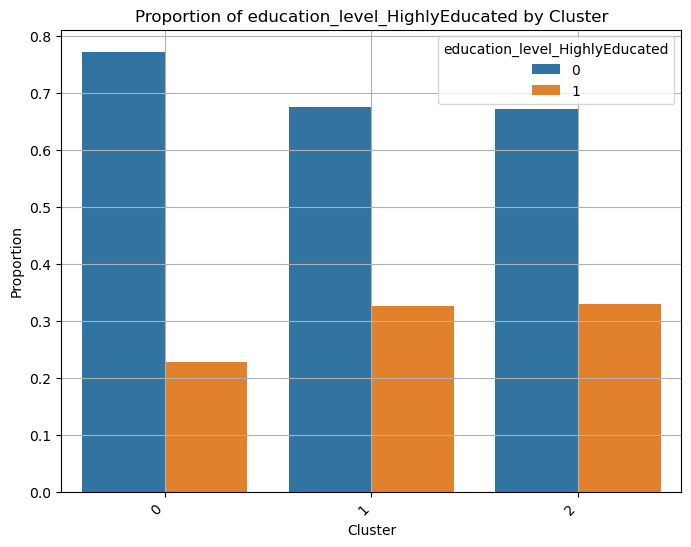

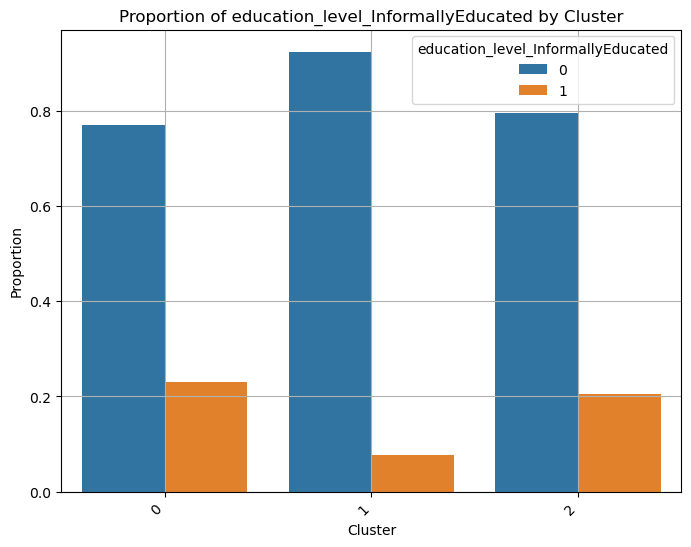

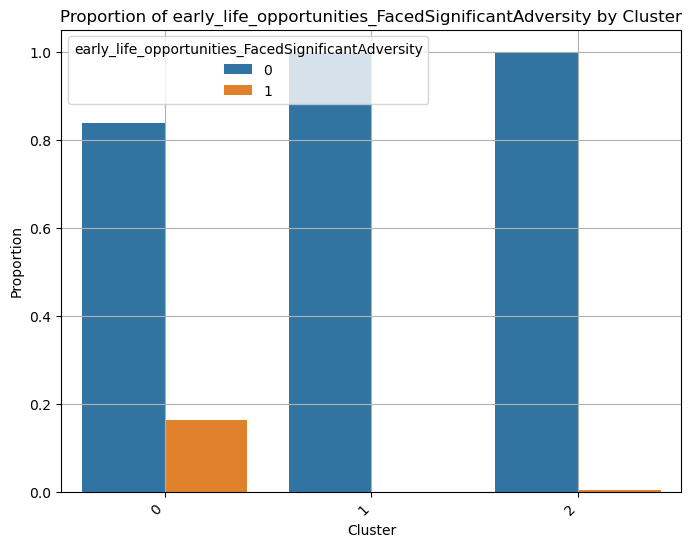

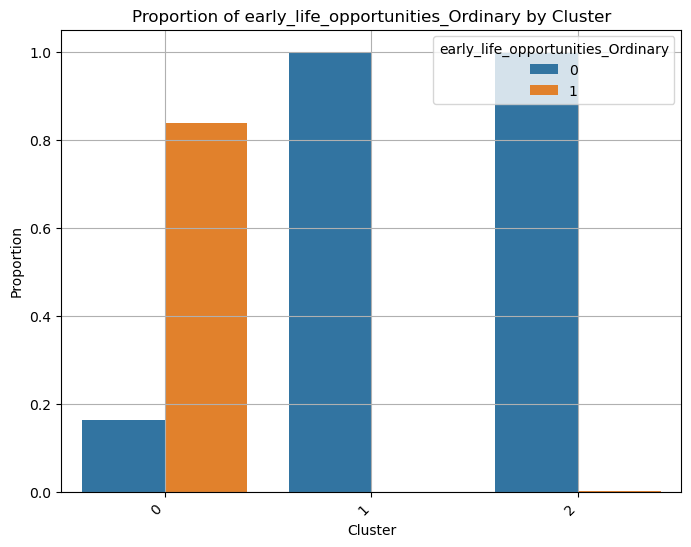

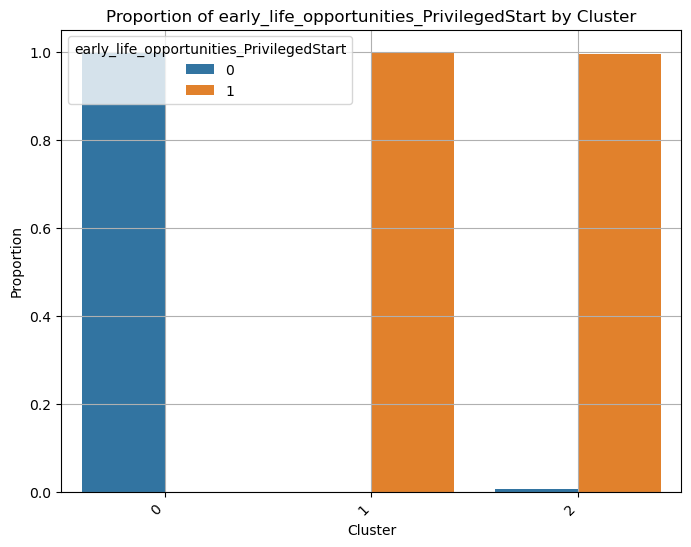

In [308]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze each column based on its type
categorical_columns = ['ActorGender_F',
       'socioeconomic_background_MiddleIncome',
       'socioeconomic_background_Privileged',
       'socioeconomic_background_Underprivileged',
       'education_level_FormallyEducated', 'education_level_HighlyEducated',
       'education_level_InformallyEducated',
       'early_life_opportunities_FacedSignificantAdversity',
       'early_life_opportunities_Ordinary',
       'early_life_opportunities_PrivilegedStart']

# Plot categorical features as proportions for each cluster
for feature in categorical_columns:
    # Calculate proportions
    cluster_counts = hot_encoded.groupby(['Cluster', feature]).size().reset_index(name='count')
    cluster_totals = cluster_counts.groupby('Cluster')['count'].transform('sum')
    cluster_counts['proportion'] = cluster_counts['count'] / cluster_totals

    # Plot proportions
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Cluster', y='proportion', hue=feature, data=cluster_counts)
    plt.title(f"Proportion of {feature} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Proportion")
    plt.legend(title=feature)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.show()


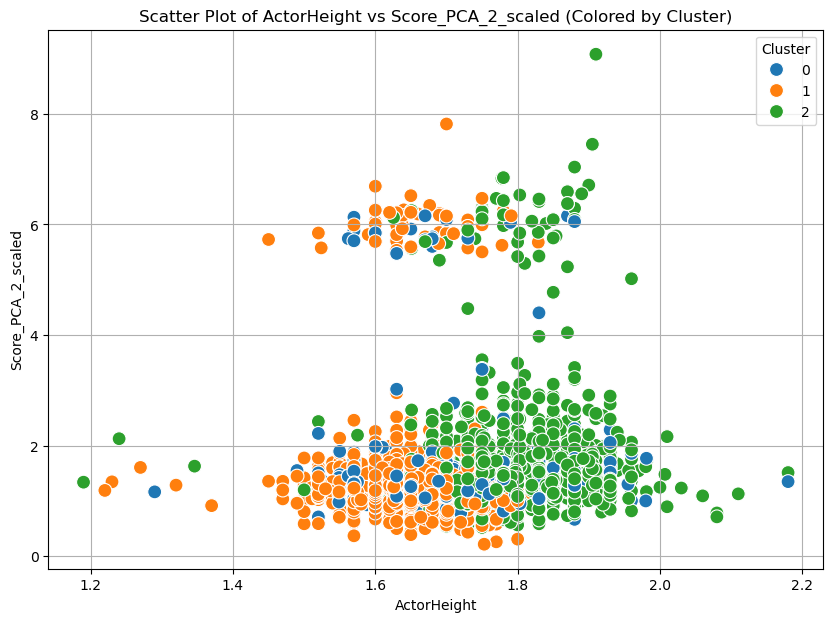

In [309]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'ActorHeight' and 'Score' with the actual numerical columns you want to plot
x_feature = 'ActorHeight'  # Feature for the x-axis
y_feature = 'Score_PCA_2_scaled'        # Feature for the y-axis

# Scatter Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=hot_encoded, x=x_feature, y=y_feature, hue='Cluster', palette='tab10', s=100)
plt.title(f"Scatter Plot of {x_feature} vs {y_feature} (Colored by Cluster)")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


In [310]:
hot_encoded.columns

Index(['Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs',
       'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Brown_Hair',
       'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Goatee', 'Gray_Hair',
       'High_Cheekbones', 'Male', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Straight_Hair', 'Wavy_Hair',
       'Score_PCA_2_scaled', 'ActorHeight', 'ActorGender_F', 'ActorGender_M',
       'socioeconomic_background_MiddleIncome',
       'socioeconomic_background_Privileged',
       'socioeconomic_background_Underprivileged',
       'education_level_FormallyEducated', 'education_level_HighlyEducated',
       'education_level_InformallyEducated',
       'early_life_opportunities_FacedSignificantAdversity',
       'early_life_opportunities_Ordinary',
       'early_life_opportunities_PrivilegedStart', 'Cluster'],
      dtype='object')

Clusters found: 3
Noise points: 462


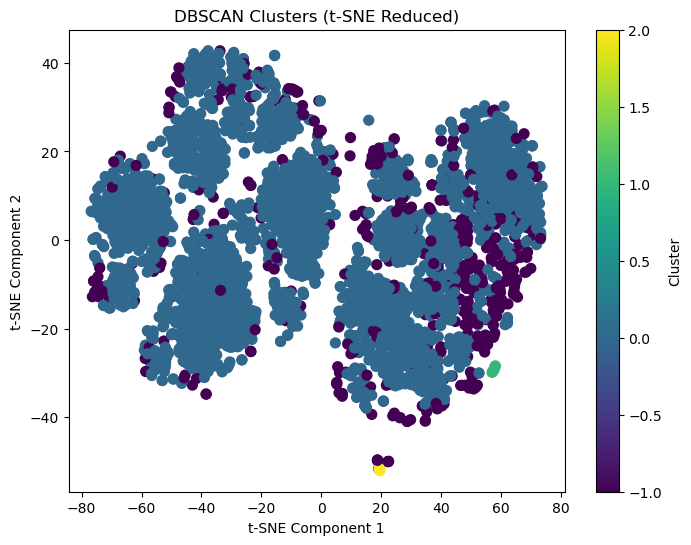

In [333]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming your DataFrame is called `hot_encoded`
# Separate features from the target
features = hot_encoded.drop(columns=['Score_PCA_2_scaled'])
target = hot_encoded['Score_PCA_2_scaled']

# Scale the continuous 'ActorHeight' column
scaler = StandardScaler()
features['ActorHeight'] = scaler.fit_transform(features[['ActorHeight']])

# Fit DBSCAN
dbscan = DBSCAN(eps=0.11, min_samples=5, metric='hamming')  # Adjust `eps` and `min_samples` as needed
labels = dbscan.fit_predict(features)

# Add cluster labels to the dataset
features['Cluster'] = labels

# Analyze clusters
unique_labels = set(labels)
print(f"Clusters found: {len(unique_labels) - (1 if -1 in unique_labels else 0)}")
print(f"Noise points: {sum(labels == -1)}")

# Dimensionality Reduction with t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
reduced_data_tsne = tsne.fit_transform(features.drop(columns=['Cluster']))

# Visualize Clusters (t-SNE)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=features['Cluster'], cmap='viridis', s=50)
plt.title("DBSCAN Clusters (t-SNE Reduced)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="Cluster")
plt.show()


In [342]:
hot_encoded['Cluster_Label'] = labels
hot_encoded = hot_encoded[hot_encoded['Cluster_Label'] != -1] # Filter out noise points (-1) if they exist


# Height analysis

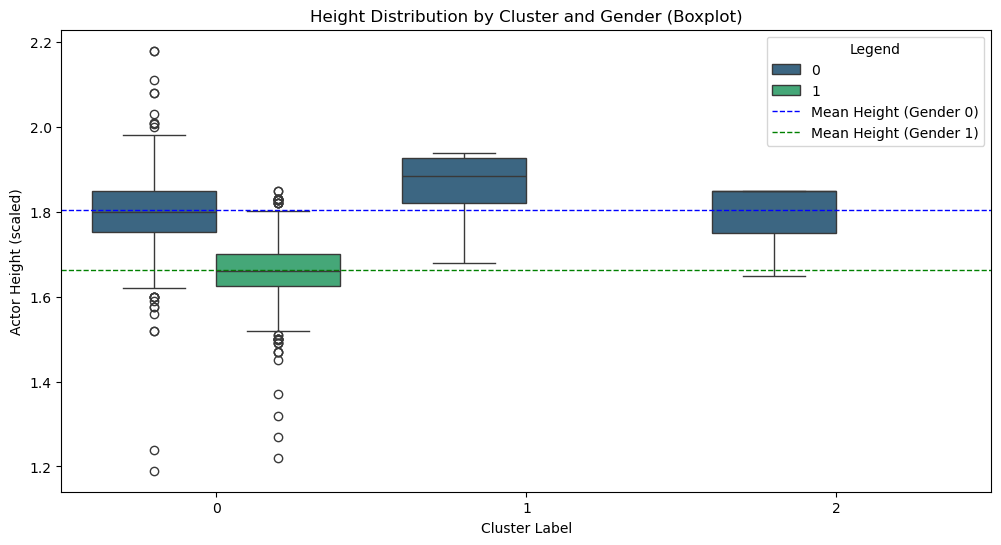

In [345]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out noise points (-1) if they exist
clusters = hot_encoded[hot_encoded['Cluster_Label'] != -1]

# Calculate means for ActorGender_F (0 and 1)
mean_height_gender_0 = clusters[clusters['ActorGender_F'] == 0]['ActorHeight'].mean()
mean_height_gender_1 = clusters[clusters['ActorGender_F'] == 1]['ActorHeight'].mean()

# Boxplot for height by cluster and gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=clusters, x='Cluster_Label', y='ActorHeight', hue='ActorGender_F', palette='viridis')

# Add mean lines
plt.axhline(mean_height_gender_0, color='blue', linestyle='--', linewidth=1, label='Mean Height (Gender 0)')
plt.axhline(mean_height_gender_1, color='green', linestyle='--', linewidth=1, label='Mean Height (Gender 1)')

# Add plot details
plt.title("Height Distribution by Cluster and Gender (Boxplot)")
plt.xlabel("Cluster Label")
plt.ylabel("Actor Height (scaled)")
plt.legend(title="Legend", loc='upper right')
plt.show()


In [344]:
print("Mean Score by Cluster:")
print(hot_encoded.groupby('Cluster')['Score_PCA_2_scaled'].describe())

Mean Score by Cluster:
          count      mean       std       min       25%       50%       75%  \
Cluster                                                                       
0         394.0  1.521153  0.949200  0.666848  1.156760  1.334411  1.546753   
1        1679.0  1.408393  0.847148  0.217400  1.116880  1.269323  1.429312   
2        1404.0  1.631463  0.890524  0.521556  1.224845  1.413719  1.734066   

              max  
Cluster            
0        6.252135  
1        7.815470  
2        9.077111  
